<a href="https://colab.research.google.com/github/mot1122/NLP_100_knock/blob/main/chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29. 夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2022-01-12 18:32:22--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.02s   

2022-01-12 18:32:22 (39.7 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
 !apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [ ]:
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [ ]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


30. 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
filename="./neko.txt.mecab"
sentenses,morphs=[],[]
with open(filename,mode="r") as f:
  for line in f:
    if line!="EOS\n":
      fields=line.split("\t")
      if len(fields)!=2 or fields[0]==' ':continue
      attr=fields[1].split(",")
      morph={"surface":fields[0], "base":attr[6], "pos":attr[0], "pos1":attr[1]}
      morphs.append(morph)
      
    else:
      sentenses.append(morphs)
      morphs=[]


In [ ]:
for morph in sentenses[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}


31. 動詞の表層形をすべて抽出せよ．

In [ ]:
verbs=set()
for sentense in sentenses:
  for morphs in sentense:
    if morphs["pos"]=="動詞":
      verbs.add(morphs["surface"])

In [ ]:
print(f"動詞の表層形の種類：{len(verbs)}\n")
print("---サンプル---")
for verb in list(verbs)[:5]:
  print(verb)


動詞の表層形の種類：3893

---サンプル---
卸す
せしめ
まえ
恐れ入り
申し込ん


32. 動詞の原形をすべて抽出せよ．

In [ ]:
bases=set()
for sentense in sentenses:
  for morph in sentense:
    if morph["pos"]=="動詞":
      bases.add(morph["base"])

In [ ]:
print(f"動詞の原型の種類: {len(bases)}\n")
print("---サンプル---")
for base in list(bases)[:5]:
  print(base)

動詞の原型の種類: 2300

---サンプル---
卸す
坐る
におう
輝く
覚る


33. 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
nps=set()
for sentense in sentenses:
  for i in range(1,len(sentense)-1):
    front,middle,back=sentense[i-1],sentense[i],sentense[i+1]
    if front["pos"]=="名詞" and middle["surface"]=="の" and back["pos"]=="名詞":
      nps.add(front["surface"]+middle["surface"]+back["surface"])

In [ ]:
print("f「の」で連結されている名詞句の種類:{len(nps)}\n")
print("----サンプル----")
for np in list(nps)[:5]:
  print(np)

f「の」で連結されている名詞句の種類:{len(nps)}

----サンプル----
疋の怪物
顔の前
軽蔑の極
君の座敷
脱兎の勢


34. 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
ncs=set()
nc=""
n=0
for sentense in sentenses:
  for morph in sentense:
    if morph["pos"]=="名詞":
      nc+=morph["surface"]
      n+=1
    else:
      if n>2:
        ncs.add(nc)
      nc=""
      n=0
      

In [ ]:
print(f"連結名詞の種類: {len(ncs)}\n")
print("----サンプル----")
for nc in list(ncs)[:5]:
  print(nc)

連結名詞の種類: 1189

----サンプル----
寒厨何
蒲原郡筍谷
時蟷螂君
どれ一つ拝見
御苦労千万


35. 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
from collections import defaultdict

freq=defaultdict(int)
for sentense in sentenses:
  for morph in sentense:
    if morph["pos"]!="記号":
      freq[morph["base"]]+=1


In [ ]:
freq=sorted(freq.items(),key=lambda t:t[1],reverse=True)

In [ ]:
for w in freq[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


36. 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 12.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=54e4227a003f1a75685a5e4e4eb90481b282ce54dc3461f9e645f059fc37096b
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

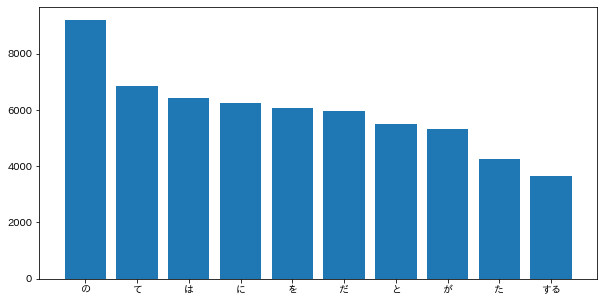

In [47]:
keys=[w[0] for w in freq[:10]]
values=[w[1] for w in freq[:10]]
plt.figure(figsize=(10,5))
plt.bar(keys,values)
plt.show()

37. 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
cocat=defaultdict(int)
for sentence in sentenses:
  if "猫" in [morph["surface"] for morph in sentence]:
    for morph in sentence:
      if morph["pos"]!="記号":
        cocat[morph["base"]]+=1
del cocat["猫"]

In [ ]:
cocat=sorted(cocat.items(),key=lambda t:t[1],reverse=True)

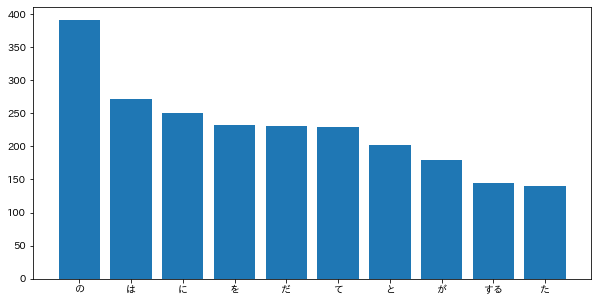

In [ ]:
keys=[w[0] for w in cocat[:10]]
values=[w[1] for w in cocat[:10]]
plt.figure(figsize=(10,5))
plt.bar(keys,values)
plt.show()

38. 単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

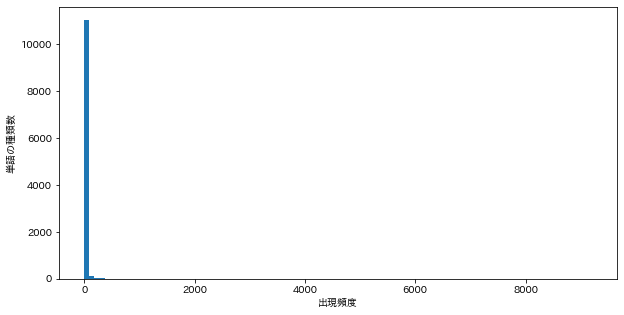

In [50]:
values=[w[1] for w in freq]
plt.figure(figsize=(10,5))
plt.hist(values,bins=100)
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

39. 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

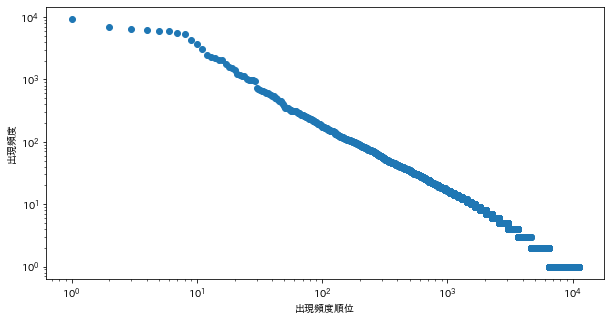

In [51]:
ranks=range(1,len(freq)+1)
values=[w[1] for w in freq]
plt.figure(figsize=(10,5))
plt.scatter(ranks,values)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.show()